<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/optuna_SVM_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# optunaを用いたSVM のハイパーパラメータの最適化

In [1]:
!pip install optuna

   ---------------------------------------- 0.0/362.8 kB ? eta -:--:--
   ------ --------------------------------- 61.4/362.8 kB 1.7 MB/s eta 0:00:01
   --------------- ------------------------ 143.4/362.8 kB 1.7 MB/s eta 0:00:01
   -------------------------------------- - 348.2/362.8 kB 2.7 MB/s eta 0:00:01
   ---------------------------------------- 362.8/362.8 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/233.0 kB ? eta -:--:--
   ----------------------------- ---------- 174.1/233.0 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 233.0/233.0 kB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/78.6 kB ? eta -:--:--
   ---------------------------------------- 78.6/78.6 kB 2.1 MB/s eta 0:00:00


In [2]:
import optuna
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
# Iris Data (2 features)
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target
target_names = iris.target_names

print('Size of the data = ', X.shape)

n = X.shape[0]
mdim = X.shape[1]

print('N=', n, 'mdim=', mdim)

print('size of y', y.shape)

Size of the data =  (150, 2)
N= 150 mdim= 2
size of y (150,)


## SVM with linear kernel

The best parameter C is searched

In [4]:
# 目的関数の定義
def objective_linear(trial):
    # ハイパーパラメータの範囲指定
    C = trial.suggest_float("C", 1e-2, 1e3, log=True)

    # モデルの学習
    svm = SVC(C=C, kernel='linear')
#    svm.fit(X_train, y_train)
    scores = cross_val_score(svm, X, y, cv=5)
#    print(scores)

    # モデルの評価
#    y_pred = svm.predict(X_test)
#    accuracy = accuracy_score(y_test, y_pred)
    accuracy = scores.mean()

    return accuracy

In [5]:
# 最適化プロセスの実行
study = optuna.create_study(direction="maximize")
study.optimize(objective_linear, n_trials=100)

# 最適化結果の表示
print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print(f"  Params: {trial.params}")

[I 2024-09-18 07:14:49,478] A new study created in memory with name: no-name-509faf77-c5d9-4fcf-83ff-a0e786ff6ef6
[I 2024-09-18 07:14:49,507] Trial 0 finished with value: 0.8133333333333332 and parameters: {'C': 0.2131483834792423}. Best is trial 0 with value: 0.8133333333333332.
[I 2024-09-18 07:14:49,521] Trial 1 finished with value: 0.8 and parameters: {'C': 0.039630420529085955}. Best is trial 0 with value: 0.8133333333333332.
[I 2024-09-18 07:14:49,533] Trial 2 finished with value: 0.82 and parameters: {'C': 0.5333060643592157}. Best is trial 2 with value: 0.82.
[I 2024-09-18 07:14:49,546] Trial 3 finished with value: 0.8133333333333332 and parameters: {'C': 1.3217629920700016}. Best is trial 2 with value: 0.82.
[I 2024-09-18 07:14:49,561] Trial 4 finished with value: 0.82 and parameters: {'C': 79.83896292748796}. Best is trial 2 with value: 0.82.
[I 2024-09-18 07:14:49,611] Trial 5 finished with value: 0.8066666666666666 and parameters: {'C': 0.11062298495338854}. Best is trial 2

Best trial:
  Value: 0.8200000000000001
  Params: {'C': 12.531420998683267}


In [6]:
C_opt = trial.params['C']
print('Best C is ', C_opt)

svm = SVC(C=C_opt, kernel='linear')
svm.fit(X, y)
# Test Accuracy
y_pred = svm.predict(X)
accuracy = accuracy_score(y, y_pred)
print('Train Accuracy = ', accuracy)


Best C is  12.531420998683267
Train Accuracy =  0.82


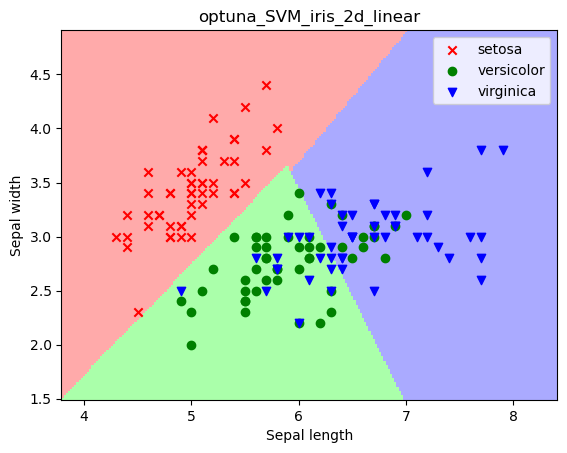

In [7]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

## colors
colors = ['red', 'green', 'blue']
markers = ['x', 'o', 'v']

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

(xsize, ysize) = xx.shape
nelm = xsize * ysize

XX = np.c_[xx.reshape((nelm,1)), yy.reshape((nelm,1))]
#print XX

Z = svm.predict(XX)
#print('Z\n', Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
#plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
for k, c, marker, target_name  in zip([0, 1, 2], colors, markers, target_names):
    plt.scatter(X[y == k, 0], X[y == k, 1], c=c, marker=marker, label = target_name)
#plt.scatter(data[:, 0], data[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.legend()
plt.title('optuna_SVM_iris_2d_linear')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.savefig('optuna_SVM_iris_2d_linear.png')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.show()

## SVM with RBF kernel

The parameters C and gamma are searched

In [8]:
# 目的関数の定義
def objective_rbf(trial):
    # ハイパーパラメータの範囲指定
    C = trial.suggest_float("C", 1e-2, 1e3, log=True)
    gamma = trial.suggest_float("gamma", 1e-2, 1e2, log=True)

    # モデルの学習
    svm = SVC(C=C, kernel='rbf', gamma=gamma)
#    svm.fit(X_train, y_train)
    scores = cross_val_score(svm, X, y, cv=5)
#    print(scores)

    # モデルの評価
#    y_pred = svm.predict(X_test)
#    accuracy = accuracy_score(y_test, y_pred)
    accuracy = scores.mean()

    return accuracy

In [9]:
# 最適化プロセスの実行
study = optuna.create_study(direction="maximize")
study.optimize(objective_rbf, n_trials=100)

# 最適化結果の表示
print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print(f"  Params: {trial.params}")

[I 2024-09-18 07:14:52,020] A new study created in memory with name: no-name-a90c13f2-2348-4ed1-8164-0203e8b5536a
[I 2024-09-18 07:14:52,041] Trial 0 finished with value: 0.74 and parameters: {'C': 0.2687503038755295, 'gamma': 21.35214119532501}. Best is trial 0 with value: 0.74.
[I 2024-09-18 07:14:52,059] Trial 1 finished with value: 0.6866666666666666 and parameters: {'C': 168.06993185523288, 'gamma': 67.98579921167928}. Best is trial 0 with value: 0.74.
[I 2024-09-18 07:14:52,076] Trial 2 finished with value: 0.7600000000000001 and parameters: {'C': 0.01061828609384414, 'gamma': 0.04992347125257941}. Best is trial 2 with value: 0.7600000000000001.
[I 2024-09-18 07:14:52,093] Trial 3 finished with value: 0.6866666666666665 and parameters: {'C': 0.02597317654641076, 'gamma': 77.55981037867328}. Best is trial 2 with value: 0.7600000000000001.
[I 2024-09-18 07:14:52,112] Trial 4 finished with value: 0.72 and parameters: {'C': 121.67677511280655, 'gamma': 17.499121674107222}. Best is tr

Best trial:
  Value: 0.8400000000000001
  Params: {'C': 0.38306875842383853, 'gamma': 1.0538799319667906}


In [10]:
C_opt = trial.params['C']
print('Best C is ', C_opt)
gamma_opt = trial.params['gamma']
print('Best gamma is ', gamma_opt)

svm = SVC(C=C_opt, kernel='rbf', gamma=gamma_opt)
svm.fit(X, y)
# Test Accuracy
y_pred = svm.predict(X)
accuracy = accuracy_score(y, y_pred)
print('Train Accuracy = ', accuracy)

Best C is  0.38306875842383853
Best gamma is  1.0538799319667906
Train Accuracy =  0.8266666666666667


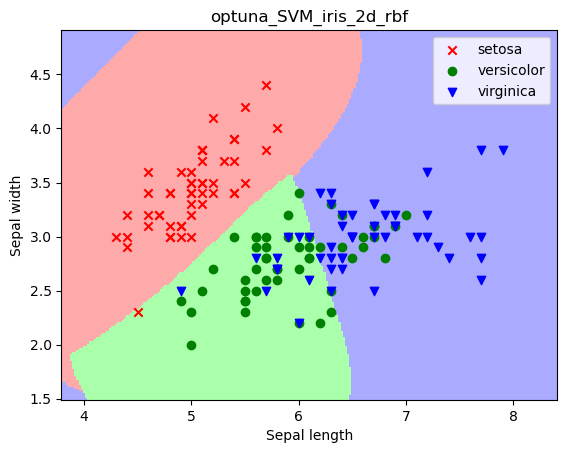

In [11]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

## colors
colors = ['red', 'green', 'blue']
markers = ['x', 'o', 'v']

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

(xsize, ysize) = xx.shape
nelm = xsize * ysize

XX = np.c_[xx.reshape((nelm,1)), yy.reshape((nelm,1))]
#print XX

Z = svm.predict(XX)
#print('Z\n', Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
#plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
for k, c, marker, target_name  in zip([0, 1, 2], colors, markers, target_names):
    plt.scatter(X[y == k, 0], X[y == k, 1], c=c, marker=marker, label = target_name)
#plt.scatter(data[:, 0], data[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.legend()
plt.title('optuna_SVM_iris_2d_rbf')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.savefig('optuna_SVM_iris_2d_rbf.png')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.show()

## SVM with polynomial kernel

The best parameters C and degree are searched.

In [12]:
# 目的関数の定義
def objective_poly(trial):
    # ハイパーパラメータの範囲指定
    C = trial.suggest_float("C", 1e-2, 1e3, log=True)
    degree = trial.suggest_int("degree", 1, 4)

    # モデルの学習
    svm = SVC(C=C, kernel='poly', degree = degree)
#    svm.fit(X_train, y_train)
    scores = cross_val_score(svm, X, y, cv=5)
#    print(scores)

    # モデルの評価
#    y_pred = svm.predict(X_test)
#    accuracy = accuracy_score(y_test, y_pred)
    accuracy = scores.mean()

    return accuracy

In [13]:
# 最適化プロセスの実行
study = optuna.create_study(direction="maximize")
study.optimize(objective_poly, n_trials=100)

# 最適化結果の表示
print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print(f"  Params: {trial.params}")

[I 2024-09-18 07:14:55,471] A new study created in memory with name: no-name-50c6f352-b2e8-4e8a-862a-5520abbe7bc9
[I 2024-09-18 07:14:55,485] Trial 0 finished with value: 0.8266666666666668 and parameters: {'C': 193.21808412178632, 'degree': 1}. Best is trial 0 with value: 0.8266666666666668.
[I 2024-09-18 07:14:55,499] Trial 1 finished with value: 0.8066666666666666 and parameters: {'C': 0.028142526290088996, 'degree': 4}. Best is trial 0 with value: 0.8266666666666668.
[I 2024-09-18 07:14:55,516] Trial 2 finished with value: 0.7866666666666666 and parameters: {'C': 0.01933317677540863, 'degree': 2}. Best is trial 0 with value: 0.8266666666666668.
[I 2024-09-18 07:14:55,548] Trial 3 finished with value: 0.76 and parameters: {'C': 0.05275668146564742, 'degree': 1}. Best is trial 0 with value: 0.8266666666666668.
[I 2024-09-18 07:15:16,368] Trial 4 finished with value: 0.8066666666666666 and parameters: {'C': 704.8051538766886, 'degree': 4}. Best is trial 0 with value: 0.826666666666666

Best trial:
  Value: 0.8266666666666668
  Params: {'C': 193.21808412178632, 'degree': 1}


In [14]:
C_opt = trial.params['C']
print('Best C is ', C_opt)
degree_opt = trial.params['degree']
print('Best degree is ', degree_opt)

svm = SVC(C=C_opt, kernel='poly', degree=degree_opt)
svm.fit(X, y)
# Test Accuracy
y_pred = svm.predict(X)
accuracy = accuracy_score(y, y_pred)
print('Train Accuracy = ', accuracy)

Best C is  193.21808412178632
Best degree is  1
Train Accuracy =  0.82


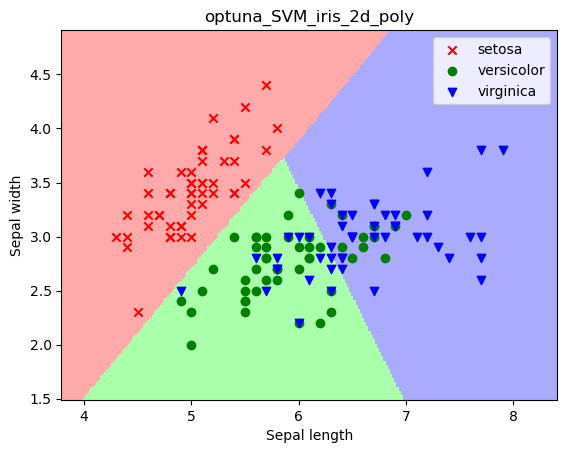

In [15]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

## colors
colors = ['red', 'green', 'blue']
markers = ['x', 'o', 'v']

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

(xsize, ysize) = xx.shape
nelm = xsize * ysize

XX = np.c_[xx.reshape((nelm,1)), yy.reshape((nelm,1))]
#print XX

Z = svm.predict(XX)
#print('Z\n', Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
#plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
for k, c, marker, target_name  in zip([0, 1, 2], colors, markers, target_names):
    plt.scatter(X[y == k, 0], X[y == k, 1], c=c, marker=marker, label = target_name)
#plt.scatter(data[:, 0], data[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.legend()
plt.title('optuna_SVM_iris_2d_poly')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.savefig('optuna_SVM_iris_2d_poly.png')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.show()